In [2]:
%matplotlib inline


Arrows
------

Plotting arrows.




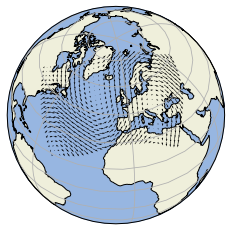

In [3]:
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cfeature


def sample_data(shape=(20, 30)):
    """
    Return ``(x, y, u, v, crs)`` of some vector data
    computed mathematically. The returned crs will be a rotated
    pole CRS, meaning that the vectors will be unevenly spaced in
    regular PlateCarree space.

    """
    crs = ccrs.RotatedPole(pole_longitude=177.5, pole_latitude=37.5)

    x = np.linspace(311.9, 391.1, shape[1])
    y = np.linspace(-23.6, 24.8, shape[0])

    x2d, y2d = np.meshgrid(x, y)
    u = 10 * (2 * np.cos(2 * np.deg2rad(x2d) + 3 * np.deg2rad(y2d + 30)) ** 2)
    v = 20 * np.cos(6 * np.deg2rad(x2d))

    return x, y, u, v, crs


def main():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(-10, 45))

    ax.add_feature(cfeature.OCEAN, zorder=0)
    ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black')

    ax.set_global()
    ax.gridlines()

    x, y, u, v, vector_crs = sample_data()
    ax.quiver(x, y, u, v, transform=vector_crs)

    plt.show()


if __name__ == '__main__':
    main()